In [1]:
import pickle

import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scienceplots
plt.style.use(['nature'])
# plt.style.use(['seaborn-v0_8-paper'])
# matplotlib.rcParams['text.usetex'] = True

from tqdm import tqdm
from shapely.geometry import LineString
from conflict import ConflictLyft

with open('./lyft_avhv_conflict.pkl', 'rb') as file:
    lyft_avhv_conflict_list = pickle.load(file)

with open('./lyft_hvhv_conflict.pkl', 'rb') as file:
    lyft_hvhv_conflict_list = pickle.load(file)

lyft_conflict_list = lyft_avhv_conflict_list + lyft_hvhv_conflict_list

# convert the type to latest conflict object
conflict_list = list()
for c_index, c in enumerate(lyft_conflict_list):
    # print(c_index)
    conflict_list.append(ConflictLyft(
        leader_id=c.first_id,
        follower_id=c.second_id,
        leader_time_at_conflict=c.first_time_at_conflict,
        follower_time_at_conflict=c.second_time_at_conflict,
        leader_is_av=c.is_first_AV,
        follower_is_av=c.is_second_AV,
        PET=c.PET,
        conflict_type=c.category.upper(),
        leader_traj=c.first_trajectory.xy[1:-1,:],
        follower_traj=c.second_trajectory.xy[1:-1,:],
        leader_traj_timestamp=c.first_trajectory.t[1:-1],
        follower_traj_timestamp=c.second_trajectory.t[1:-1],
        leader_traj_speed=c.first_trajectory.v,
        follower_traj_speed=c.second_trajectory.v,
    ))
assert len(conflict_list) == len(lyft_conflict_list)

In [ ]:
for c_index, c in enumerate(conflict_list):
    c.plot_speed_profile()
    plt.savefig(f"./outputs/speed_profile/{c_index}.png", dpi=400, bbox_inches="tight")
    plt.close()

629it [03:17,  3.18it/s]

KeyboardInterrupt



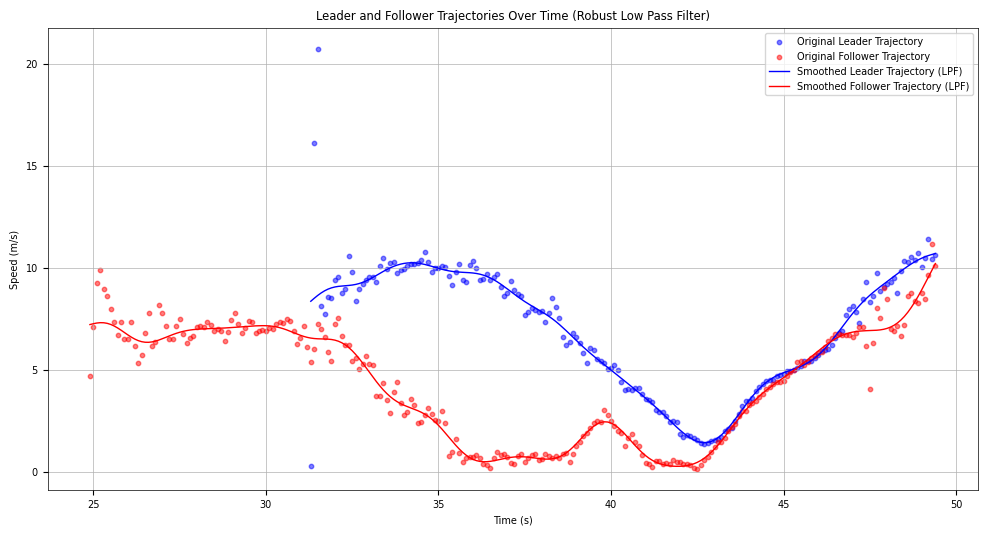

In [10]:
# import scipy.signal
# from scipy.signal import butter, filtfilt
# from tqdm import tqdm


# def remove_outliers(data, jump_threshold=2, offset:int=10):
#     smoothed_data = data.copy()

#     # remove the jumps in the beginning of speed profile
#     for index in [4,3,2,1,0]:
#         if abs(smoothed_data[index] - smoothed_data[index: index + offset].mean()) > jump_threshold:
#             smoothed_data[index] = smoothed_data[index: index + offset].mean()

#     # remove the jumps in the middle of speed profile
#     for i in range(1, len(smoothed_data) - 2):
#         if abs(smoothed_data[i] - smoothed_data[i-1]) > jump_threshold and \
#            abs(smoothed_data[i] - smoothed_data[i+2]) > jump_threshold:
#             smoothed_data[i] = (smoothed_data[i-1] + smoothed_data[i+2]) / 2
#     return smoothed_data
    

# def robust_low_pass_filter(data, cutoff=0.5, fs=10.0, order=4, jump_threshold=1):
#     # Remove outliers
#     data_no_outliers = remove_outliers(data, jump_threshold)
#     # Apply low-pass filter
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data_no_outliers)
#     return y
    

# for c_index, c in tqdm(enumerate(conflict_list)):
#     # print(c_index)
#     # Apply the robust low-pass filter to the leader and follower data
#     leader_v_smooth_lp = robust_low_pass_filter(c.leader_traj_speed, cutoff=0.5, fs=10.0, order=4, jump_threshold=1)
#     follower_v_smooth_lp = robust_low_pass_filter(c.follower_traj_speed, cutoff=0.5, fs=10.0, order=4, jump_threshold=1)
    
#     # Plotting the original data and the smoothed data using Low Pass Filter
#     plt.figure(figsize=(12, 6))
    
#     plt.scatter(c.leader_traj_timestamp, c.leader_traj_speed, label='Original Leader Trajectory', color='blue', s=10, alpha=0.5)
#     plt.scatter(c.follower_traj_timestamp, c.follower_traj_speed, label='Original Follower Trajectory', color='red', s=10, alpha=0.5)
#     plt.plot(c.leader_traj_timestamp, leader_v_smooth_lp, label='Smoothed Leader Trajectory (LPF)', color='blue')
#     plt.plot(c.follower_traj_timestamp, follower_v_smooth_lp, label='Smoothed Follower Trajectory (LPF)', color='red')
    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Speed (m/s)')
#     plt.title('Leader and Follower Trajectories Over Time (Robust Low Pass Filter)')
#     plt.legend()
#     plt.grid(True)
#     plt.savefig(f"./outputs/speed_profile/{c_index}.png")
#     # plt.show()
#     plt.close()

In [13]:
# def plot_smoothed_speed_profile_comparison(
#     conflict: ConflictLyft,
#     smooth_av: bool = True, jump_threshold=1
# ):
#     """ draw the raw and smoothed versions of the speed profiles of the vehicles involved in the conflict """
#     FIGURE_WIDTH, FIGURE_HEIGHT = 6, 2
#     LEADER_BEFORE_COLOR = "green"
#     LEADRE_AFTER_COLOR = "blue"
#     FOLLOWER_BEFORE_COLOR = "red" 
#     FOLLOWER_AFTER_COLOR = "orange"
#     MARKER_SIZE = 1
#     VERTICAL_LINE_STYLE = "--"
    
#     fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
            
#     # raw speed profiles:
#     # axs[0].plot(conflict.leader_traj_timestamp, conflict.leader_traj_speed, c=LEADER_COLOR, label="Leader")
#     # axs[0].plot(conflict.follower_traj_timestamp, conflict.follower_traj_speed, c=FOLLOWER_COLOR, label="Follower")
#     # axs[0].axvline(x=conflict.leader_time_at_conflict, c=LEADER_COLOR, ls=VERTICAL_LINE_STYLE, label="Leader at conflict point")
#     # axs[0].axvline(x=conflict.follower_time_at_conflict, c=FOLLOWER_COLOR, ls=VERTICAL_LINE_STYLE, label="Follower at conflict point")
#     # axs[0].set_xlim([0, 20])
#     # axs[0].set_ylabel("Speed (m/s)")
#     # axs[0].legend(loc='best')        
#     # axs[0].set_title("Before data smoothing")

#     def three_sigma_smoothing(signal, window_size=30, threshold=0.15):
#         """
#         Apply 3-sigma smoothing to a signal.
        
#         Parameters:
#             - signal: The input signal to be smoothed.
#             - window_size: The size of the smoothing window.
#             - threshold: The threshold in terms of standard deviations.
        
#         Returns:
#             - smoothed_signal: The smoothed signal.
#         """
#         smoothed_signal = np.zeros_like(signal)
#         for i in range(len(signal)):
#             start = max(0, i - window_size//2)
#             end = min(len(signal), i + window_size//2 + 1)
#             window = signal[start:end]
#             mean = np.mean(window)
#             std = np.std(window)
#             if np.abs(signal[i] - mean) > threshold * std:
#                 smoothed_signal[i] = mean
#             else:
#                 smoothed_signal[i] = signal[i]
#         return smoothed_signal

#     # smooth operation
#     if conflict.leader_is_av:
#         if smooth_av:
#             leader_smoothed_v = conflict.leader_traj_speed.copy()
#             for i in range(1, len(leader_smoothed_v) - 1):
#                 if abs(leader_smoothed_v[i] - leader_smoothed_v[i-1]) > jump_threshold and \
#                     abs(leader_smoothed_v[i] - leader_smoothed_v[i+2]) > jump_threshold: 
#                     leader_smoothed_v[i] = (leader_smoothed_v[i-1] + leader_smoothed_v[i+2]) / 2
            
#             leader_smoothed_v = three_sigma_smoothing(leader_smoothed_v)
            
#         else:
#             leader_smoothed_v = conflict.leader_traj_speed
#     else:
#         # smooth the HV speed profile
#         leader_smoothed_v = three_sigma_smoothing(conflict.leader_traj_speed)

#     if conflict.follower_is_av:
#         if smooth_av:
#             follower_smoothed_v = conflict.follower_traj_speed.copy()
#             for i in range(1, len(follower_smoothed_v) - 1):
#                 if abs(follower_smoothed_v[i] - follower_smoothed_v[i-1]) > jump_threshold and \
#                     abs(follower_smoothed_v[i] - follower_smoothed_v[i+2]) > jump_threshold: 
#                     follower_smoothed_v[i] = (follower_smoothed_v[i-1] + follower_smoothed_v[i+2]) / 2
            
#             follower_smoothed_v = three_sigma_smoothing(follower_smoothed_v)

#         else:
#             follower_smoothed_v = conflict.follower_traj_speed
#     else:
#         # smooth the HV speed profile
#         follower_smoothed_v = three_sigma_smoothing(conflict.follower_traj_speed)    

#     axs.plot(conflict.leader_traj_timestamp, conflict.leader_traj_speed, c=LEADER_BEFORE_COLOR, label="Leader (before smoothing)")
#     axs.plot(conflict.leader_traj_timestamp, leader_smoothed_v, c=LEADRE_AFTER_COLOR, label="Leader (after smoothing)")
#     axs.plot(conflict.follower_traj_timestamp, conflict.follower_traj_speed, c=FOLLOWER_BEFORE_COLOR, label="Follower (before smoothing)")
#     axs.plot(conflict.follower_traj_timestamp, follower_smoothed_v, c=FOLLOWER_AFTER_COLOR, label="Follower (after smoothing)")

#     # axs.axvline(x=conflict.leader_time_at_conflict, c=LEADER_COLOR, ls=VERTICAL_LINE_STYLE, label="Leader at conflict point")
#     # axs.axvline(x=conflict.follower_time_at_conflict, c=FOLLOWER_COLOR, ls=VERTICAL_LINE_STYLE, label="Follower at conflict point")
#     axs.set_xlim([0, 50])
#     axs.set_xlabel("Timestamp (s)")
#     axs.set_ylabel("Speed (m/s)")
#     axs.legend(loc='best') 
#     # axs.set_title("After data smoothing")
    
#     plt.suptitle(f"{conflict.leader_type}-{conflict.follower_type} - {conflict.conflict_type} (Lyft)")
#     plt.savefig(f"./outputs/speed_profile.png", dpi=400, bbox_inches="tight")
#     plt.show()

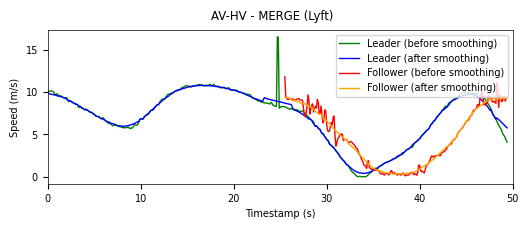

In [15]:
plot_smoothed_speed_profile_comparison(conflict_list[163], True)